<a href="https://colab.research.google.com/github/agastya-choudhary123/SR_2025/blob/main/Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import everything
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import lightgbm as lgb
import optuna



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.0 MB/s eta 0:00:00


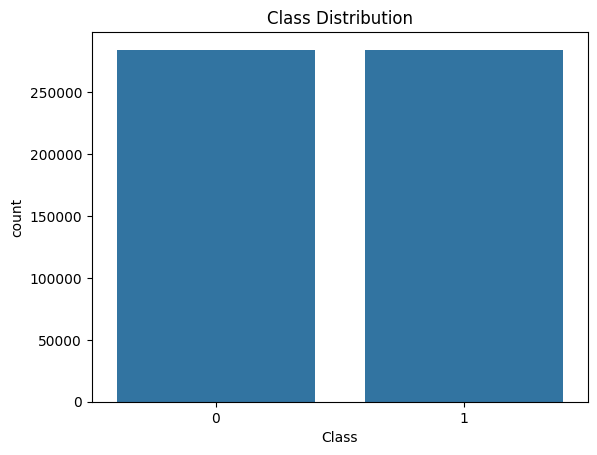

In [ ]:
df = pd.read_csv('/content/drive/My Drive/creditcard_2023.csv') #import csv file of fraud dataset into Colab
#print(df.head())
#print(df.describe())
#print(df.info())
#print(df.isnull().sum())
#print(df.duplicated().sum())
#print(df['Class'].value_counts())
sns.countplot(x='Class', data = df)
plt.title('Class Distribution')
plt.show() #helps visualize if the number of fraudulent (1) and non-fraudulent cases (0) is equal or not

In [ ]:
X = df.drop(columns=['Class']) #define what features the model will be trained on
Y = df['Class'] #defines what the model needs to predict
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #standardizes all the data so any imbalances or inequalities are balanced out

#split data into training, validation, and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y, test_size=0.3, random_state=42, stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

#define the regression model and predict using logistic regression (which should be weaker than LightGBM)
regression = LogisticRegression()
regression.fit(X_train, Y_train)
Y_regression_prediction = regression.predict(X_val)


print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")
print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_score(Y_val, Y_regression_prediction):.4f}")
print(f"Precision: {precision_score(Y_val, Y_regression_prediction):.4f}")
print(f"Recall: {recall_score(Y_val, Y_regression_prediction):.4f}")
print(f"F1 Score: {f1_score(Y_val, Y_regression_prediction):.4f}")
print(f"AUC-ROC: {roc_auc_score(Y_val, Y_regression_prediction):.4f}")




Train size: 398041, Validation size: 85294, Test size: 85295
Baseline Model Performance:
Accuracy: 0.9983
Precision: 0.9992
Recall: 0.9973
F1 Score: 0.9983
AUC-ROC: 0.9983


In [ ]:
#define features, prediction variable, and standardize the data
X = df.drop(columns=['Class'])
Y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split the data into training, validation, and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y, test_size=0.3, random_state=42, stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

training_data = lgb.Dataset(X_train, label = Y_train)
validation_data = lgb.Dataset(X_val, label = Y_val, reference = training_data)
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting type': 'gbdt',
    'learning rate': 0.1, #how much each tree corrects the model to refine predictions
    'num_leaves': 31, #default
    'max depth': -1, #to avoid tree complexity issues, allow infinite depth
    'verbose': -1 #suppresses output
}

lgb_model = lgb.train(parameters, training_data, valid_sets = [validation_data], callbacks=[lgb.early_stopping(50)]) #use early stopping to prevent overfitting
y_prediction_lgb = (lgb_model.predict(X_val) > 0.5).astype(int) #cast prediction to an integer 0 or 1

print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(Y_val, y_prediction_lgb):.4f}")
print(f"Precision: {precision_score(Y_val, y_prediction_lgb):.4f}")
print(f"Recall: {recall_score(Y_val, y_prediction_lgb):.4f}")
print(f"F1 Score: {f1_score(Y_val, y_prediction_lgb):.4f}")
print(f"AUC-ROC: {roc_auc_score(Y_val, y_prediction_lgb):.4f}")



Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's auc: 0.999951

LightGBM Model Performance:
Accuracy: 0.9997
Precision: 0.9999
Recall: 0.9996
F1 Score: 0.9997
AUC-ROC: 0.9997


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
X = df.drop(columns=['Class'])
Y = df['Class']

# split data into training, validation, and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

#define hyperparameter tuning function - uses Bayesian optimization to iteratively and automatically tune the hyperparameters, and thus improve the model's predictions
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100), #minimum number of data points per leaf to create a new split
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0), #tells the model how much of the data to use each time
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0), #tells the model how many features to use each time it makes a decision
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10.0), #adds a penalty for too much importance to 1 feature
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10.0), #helps adjust the importance per feature if the model prioritizes
        'n_estimators': 500, #number of trees (rounds of learning) the model will create
        'verbose': -1 #suppress output
    }

    training_data = lgb.Dataset(X_train, label=Y_train)
    validation_data = lgb.Dataset(X_val, label=Y_val, reference=training_data)

    model = lgb.train(params, training_data, valid_sets=[validation_data], callbacks=[lgb.early_stopping(50)])
    preds = (model.predict(X_val) > 0.5).astype(int)

    return roc_auc_score(Y_val, preds)

# Creates an Optuna study with the goal of maximizing the AUC score, and runs 20 trials with the instructions given in the objective() function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# After the optimization process is complete, find the best hyperparameters for the model, then update the list with the necessary fixed parameters
best_params = study.best_params
best_params.update({'objective': 'binary', 'metric': 'auc', 'boosting_type': 'gbdt', 'verbose': -1})

training_data = lgb.Dataset(X_train, label=Y_train)
validation_data = lgb.Dataset(X_val, label=Y_val, reference=training_data)

lgb_model = lgb.train(best_params, training_data, valid_sets=[validation_data], callbacks = [lgb.early_stopping(50)])

# Predictions
y_prediction_lgb = (lgb_model.predict(X_val) > 0.5).astype(int)

# Evaluate Model
print("\nOptimized LightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(Y_val, y_prediction_lgb):.4f}")
print(f"Precision: {precision_score(Y_val, y_prediction_lgb):.4f}")
print(f"Recall: {recall_score(Y_val, y_prediction_lgb):.4f}")
print(f"F1 Score: {f1_score(Y_val, y_prediction_lgb):.4f}")
print(f"AUC-ROC: {roc_auc_score(Y_val, y_prediction_lgb):.4f}")

[I 2025-03-05 05:52:36,712] A new study created in memory with name: no-name-9995009e-a0a6-4364-b23d-d2381e7a9573


Training until validation scores don't improve for 50 rounds


[I 2025-03-05 05:52:46,472] Trial 0 finished with value: 0.9997772410720567 and parameters: {'learning_rate': 0.18116182897126748, 'num_leaves': 133, 'max_depth': 9, 'min_child_samples': 50, 'subsample': 0.79679551620329, 'colsample_bytree': 0.7214606712410869, 'reg_alpha': 1.985047770047313e-05, 'reg_lambda': 0.7806210373441301}. Best is trial 0 with value: 0.9997772410720567.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.999999
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[138]	valid_0's auc: 0.999998


[I 2025-03-05 05:53:01,080] Trial 1 finished with value: 0.9997772410720568 and parameters: {'learning_rate': 0.020479875244099686, 'num_leaves': 119, 'max_depth': 12, 'min_child_samples': 29, 'subsample': 0.6781241497961823, 'colsample_bytree': 0.8663806928932035, 'reg_alpha': 2.7099754280584873e-05, 'reg_lambda': 0.8044977820480754}. Best is trial 1 with value: 0.9997772410720568.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 0.999965


[I 2025-03-05 05:53:32,016] Trial 2 finished with value: 0.9996131029146247 and parameters: {'learning_rate': 0.008853870565282652, 'num_leaves': 20, 'max_depth': 8, 'min_child_samples': 45, 'subsample': 0.9312361157323493, 'colsample_bytree': 0.8330125916750116, 'reg_alpha': 0.000859185487505765, 'reg_lambda': 0.005921429504159676}. Best is trial 1 with value: 0.9997772410720568.


Training until validation scores don't improve for 50 rounds


[I 2025-03-05 05:53:43,677] Trial 3 finished with value: 0.9995896546064202 and parameters: {'learning_rate': 0.025808151848506482, 'num_leaves': 140, 'max_depth': 12, 'min_child_samples': 80, 'subsample': 0.7687620491049653, 'colsample_bytree': 0.9857759822395206, 'reg_alpha': 0.3530759795322453, 'reg_lambda': 0.04098055969232689}. Best is trial 1 with value: 0.9997772410720568.


Early stopping, best iteration is:
[97]	valid_0's auc: 0.9999
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.999999


[I 2025-03-05 05:53:56,291] Trial 4 finished with value: 0.9998124135343635 and parameters: {'learning_rate': 0.07308162453461386, 'num_leaves': 139, 'max_depth': 10, 'min_child_samples': 26, 'subsample': 0.9991975149565695, 'colsample_bytree': 0.800142050708116, 'reg_alpha': 0.031289153909481913, 'reg_lambda': 0.13070036529976392}. Best is trial 4 with value: 0.9998124135343635.


Training until validation scores don't improve for 50 rounds


[I 2025-03-05 05:54:01,160] Trial 5 finished with value: 0.9995075855277042 and parameters: {'learning_rate': 0.026114248173204912, 'num_leaves': 48, 'max_depth': 4, 'min_child_samples': 11, 'subsample': 0.7329166147319205, 'colsample_bytree': 0.9349739099122101, 'reg_alpha': 0.0006597479356028232, 'reg_lambda': 0.008657026782928174}. Best is trial 4 with value: 0.9998124135343635.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.999943
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.999998


[I 2025-03-05 05:54:13,970] Trial 6 finished with value: 0.9998241376884659 and parameters: {'learning_rate': 0.05954132090364023, 'num_leaves': 77, 'max_depth': 8, 'min_child_samples': 54, 'subsample': 0.6534682052694704, 'colsample_bytree': 0.6810531346988927, 'reg_alpha': 0.0307436201427142, 'reg_lambda': 0.005445921510409581}. Best is trial 6 with value: 0.9998241376884659.


Training until validation scores don't improve for 50 rounds


[I 2025-03-05 05:54:23,031] Trial 7 finished with value: 0.999788965226159 and parameters: {'learning_rate': 0.11590609812618644, 'num_leaves': 95, 'max_depth': 8, 'min_child_samples': 38, 'subsample': 0.7084681301251412, 'colsample_bytree': 0.8323730073929179, 'reg_alpha': 0.196638571567489, 'reg_lambda': 4.27824509556548e-05}. Best is trial 6 with value: 0.9998241376884659.


Early stopping, best iteration is:
[29]	valid_0's auc: 0.999996
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[152]	valid_0's auc: 0.999985


[I 2025-03-05 05:54:39,881] Trial 8 finished with value: 0.9996365512228294 and parameters: {'learning_rate': 0.007195629545934278, 'num_leaves': 42, 'max_depth': 14, 'min_child_samples': 38, 'subsample': 0.7655269252054542, 'colsample_bytree': 0.7428194004857067, 'reg_alpha': 5.079545154017476e-05, 'reg_lambda': 1.921914709862969e-05}. Best is trial 6 with value: 0.9998241376884659.


Training until validation scores don't improve for 50 rounds


[I 2025-03-05 05:54:45,076] Trial 9 finished with value: 0.9994020681407838 and parameters: {'learning_rate': 0.015407581271002984, 'num_leaves': 89, 'max_depth': 6, 'min_child_samples': 51, 'subsample': 0.7781424676988417, 'colsample_bytree': 0.9505338207055996, 'reg_alpha': 0.040645766229483224, 'reg_lambda': 0.008632820965806438}. Best is trial 6 with value: 0.9998241376884659.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.999899
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.999975


[I 2025-03-05 05:54:59,436] Trial 10 finished with value: 0.9996951719933407 and parameters: {'learning_rate': 0.05477117408539894, 'num_leaves': 68, 'max_depth': 3, 'min_child_samples': 76, 'subsample': 0.612323536170541, 'colsample_bytree': 0.6169158326098894, 'reg_alpha': 6.086635341444126, 'reg_lambda': 0.0002685355796204531}. Best is trial 6 with value: 0.9998241376884659.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.999999


[I 2025-03-05 05:55:21,387] Trial 11 finished with value: 0.9997420686097498 and parameters: {'learning_rate': 0.06201996705577503, 'num_leaves': 102, 'max_depth': 11, 'min_child_samples': 66, 'subsample': 0.987430467889214, 'colsample_bytree': 0.6345814533006234, 'reg_alpha': 0.00775361574005253, 'reg_lambda': 9.26240750140919}. Best is trial 6 with value: 0.9998241376884659.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.999994


[I 2025-03-05 05:55:38,744] Trial 12 finished with value: 0.9998241376884658 and parameters: {'learning_rate': 0.061780885480423105, 'num_leaves': 71, 'max_depth': 6, 'min_child_samples': 18, 'subsample': 0.8744234151177309, 'colsample_bytree': 0.7057890237950953, 'reg_alpha': 0.0050995203133511, 'reg_lambda': 0.0006481869023505103}. Best is trial 6 with value: 0.9998241376884659.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[141]	valid_0's auc: 0.999994


[I 2025-03-05 05:55:59,849] Trial 13 finished with value: 0.9998241376884658 and parameters: {'learning_rate': 0.04475160835168803, 'num_leaves': 69, 'max_depth': 6, 'min_child_samples': 15, 'subsample': 0.8639742571323632, 'colsample_bytree': 0.6873336901446685, 'reg_alpha': 0.001438655639551431, 'reg_lambda': 0.0006207337389316236}. Best is trial 6 with value: 0.9998241376884659.


Training until validation scores don't improve for 50 rounds


[I 2025-03-05 05:56:10,028] Trial 14 finished with value: 0.9998124135343636 and parameters: {'learning_rate': 0.10556992955802466, 'num_leaves': 67, 'max_depth': 6, 'min_child_samples': 95, 'subsample': 0.8603630325881935, 'colsample_bytree': 0.678157061266572, 'reg_alpha': 1.0561148755158813, 'reg_lambda': 0.0007986669531765006}. Best is trial 6 with value: 0.9998241376884659.


Early stopping, best iteration is:
[62]	valid_0's auc: 0.999995
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[146]	valid_0's auc: 0.999985


[I 2025-03-05 05:56:33,294] Trial 15 finished with value: 0.9998006893802612 and parameters: {'learning_rate': 0.044001355042470144, 'num_leaves': 112, 'max_depth': 5, 'min_child_samples': 66, 'subsample': 0.8728103626128639, 'colsample_bytree': 0.7453810988689566, 'reg_alpha': 0.009478499975958043, 'reg_lambda': 0.00013137407606567762}. Best is trial 6 with value: 0.9998241376884659.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.999999


[I 2025-03-05 05:56:44,961] Trial 16 finished with value: 0.9997655169179543 and parameters: {'learning_rate': 0.08886010162873485, 'num_leaves': 77, 'max_depth': 8, 'min_child_samples': 100, 'subsample': 0.6124134570620823, 'colsample_bytree': 0.6669903820637724, 'reg_alpha': 0.00014047107779099191, 'reg_lambda': 0.002923539370323905}. Best is trial 6 with value: 0.9998241376884659.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[225]	valid_0's auc: 0.999998


[I 2025-03-05 05:57:20,712] Trial 17 finished with value: 0.9998241376884658 and parameters: {'learning_rate': 0.03630285711619077, 'num_leaves': 51, 'max_depth': 7, 'min_child_samples': 22, 'subsample': 0.6610945461649796, 'colsample_bytree': 0.604190944080999, 'reg_alpha': 0.0031093431021710005, 'reg_lambda': 0.05296102921250473}. Best is trial 6 with value: 0.9998241376884659.


Training until validation scores don't improve for 50 rounds


[I 2025-03-05 05:57:32,083] Trial 18 finished with value: 0.9997420686097498 and parameters: {'learning_rate': 0.15306632265950346, 'num_leaves': 27, 'max_depth': 15, 'min_child_samples': 67, 'subsample': 0.8322402510590693, 'colsample_bytree': 0.7658461195444382, 'reg_alpha': 0.04505208629617804, 'reg_lambda': 0.0018610305818891864}. Best is trial 6 with value: 0.9998241376884659.


Early stopping, best iteration is:
[31]	valid_0's auc: 0.999985
Training until validation scores don't improve for 50 rounds


[I 2025-03-05 05:57:40,761] Trial 19 finished with value: 0.9994137922948858 and parameters: {'learning_rate': 0.013509339004426813, 'num_leaves': 83, 'max_depth': 3, 'min_child_samples': 35, 'subsample': 0.951234723616227, 'colsample_bytree': 0.7058947328900789, 'reg_alpha': 0.00016468275335941067, 'reg_lambda': 0.00010959446394988495}. Best is trial 6 with value: 0.9998241376884659.


Early stopping, best iteration is:
[23]	valid_0's auc: 0.999955
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[90]	valid_0's auc: 0.999998

Optimized LightGBM Model Performance:
Accuracy: 0.9998
Precision: 1.0000
Recall: 0.9997
F1 Score: 0.9998
AUC-ROC: 0.9998


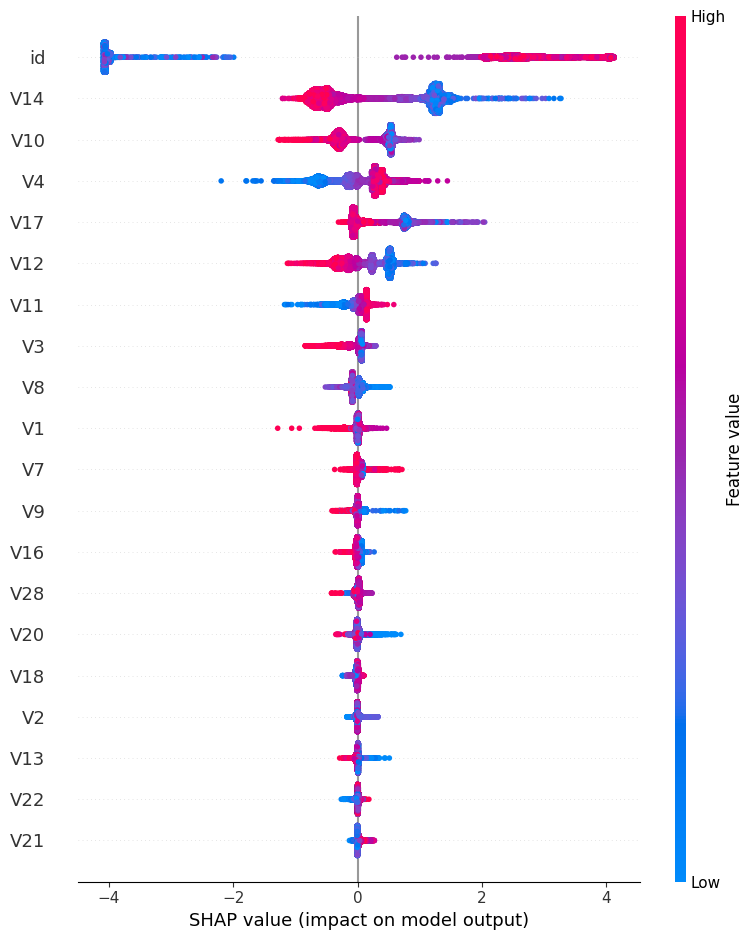

In [ ]:
import shap
explainer = shap.Explainer(lgb_model)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val)
